In [1]:
import sys
sys.path.append(r'/home/lynn/monash/anti_crispr/github/code/')
import predata ### read data from data.py
import premodel ### PreAcrs model
import pandas as pd

In [2]:
train_data,test_data=predata.get_data() ###import testing data and training data
featurename=['PSSM_AC','RPSSM','SSA']###the names of three features
y_proba_valid_all,y_verified_valid_all,test_pred_score=premodel.get_result(train_data,test_data) ###import PreAcrs results


Learning rate set to 0.008622
0:	learn: 0.6860112	total: 52.1ms	remaining: 52.1s
999:	learn: 0.0351114	total: 4.01s	remaining: 0us
Learning rate set to 0.008622
0:	learn: 0.6860112	total: 5.5ms	remaining: 5.5s
999:	learn: 0.0351114	total: 3.98s	remaining: 0us
Learning rate set to 0.007837
0:	learn: 0.6865449	total: 5.85ms	remaining: 5.84s
999:	learn: 0.0364291	total: 3.94s	remaining: 0us
Learning rate set to 0.007837
0:	learn: 0.6857253	total: 5.82ms	remaining: 5.82s
999:	learn: 0.0328862	total: 3.96s	remaining: 0us
Learning rate set to 0.007837
0:	learn: 0.6872309	total: 5.55ms	remaining: 5.54s
999:	learn: 0.0378554	total: 3.96s	remaining: 0us
Learning rate set to 0.007837
0:	learn: 0.6867136	total: 5.97ms	remaining: 5.96s
999:	learn: 0.0356697	total: 3.96s	remaining: 0us
Learning rate set to 0.007843
0:	learn: 0.6871762	total: 5.35ms	remaining: 5.34s
999:	learn: 0.0357761	total: 3.96s	remaining: 0us
Learning rate set to 0.008622
0:	learn: 0.6887799	total: 3.91ms	remaining: 3.9s
999:	

In [3]:
#metrics ['PRE','SN','SP','F_score','ACC','MCC','AUC']
validation_perfromance=premodel.metrix(y_proba_valid_all,y_verified_valid_all)
validation_perfromance

,category,PRE,SN,SP,F_score,ACC,MCC,AUC
0,fold1,0.944444,0.819277,0.951220,0.877419,0.884848,0.776800,0.979430
1,fold2,0.984127,0.746988,0.987805,0.849315,0.866667,0.756207,0.972083
2,fold3,0.968750,0.756098,0.975904,0.849315,0.866667,0.751116,0.973112
3,fold4,0.985294,0.817073,0.987952,0.893333,0.903030,0.817740,0.970908
4,fold5,0.967213,0.719512,0.975610,0.825175,0.847561,0.719103,0.963861
5,mean,0.969966,0.771790,0.975698,0.858912,0.873755,0.764193,0.968380
6,std,0.014805,0.039749,0.013386,0.023874,0.018797,0.032539,0.004976


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

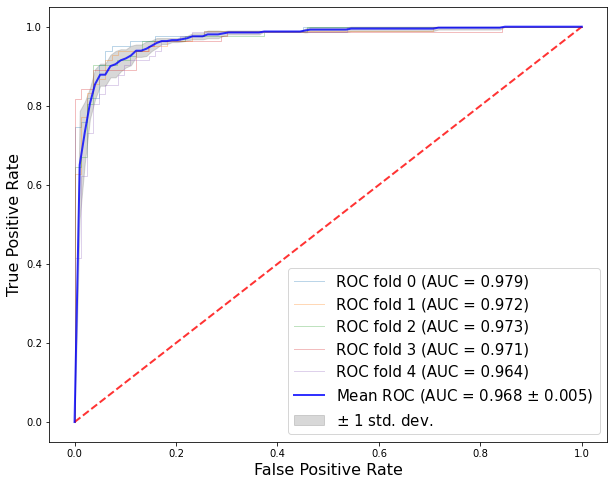

In [4]:
premodel.ROC_5_fold(y_proba_valid_all,y_verified_valid_all)


In [5]:

##the performance of the testing dataset
#metrics ['PRE','SN','SP','F_score','ACC','MCC','AUC']
pred_test=pd.DataFrame({'Predict score':test_pred_score,'Verified':test_data[0].iloc[:,0]}).reset_index(drop=True)
pred_test

,Predict score,Verified
0,0.756544,1
1,0.296165,1
2,0.518200,1
3,0.662312,1
4,0.609801,1
...,...,...
347,0.089057,0
348,0.131392,0
349,0.152193,0
350,0.447021,0


In [6]:
test_performance1=premodel.performance(test_pred_score,test_data[0].iloc[:,0])
test_performance=pd.DataFrame(columns=['PRE','SN','SP','F_score','ACC','MCC','AUC'])
test_performance.loc[0]=test_performance1
test_performance

,PRE,SN,SP,F_score,ACC,MCC,AUC
0,0.97931,0.806818,0.982955,0.884735,0.894886,0.802316,0.971946


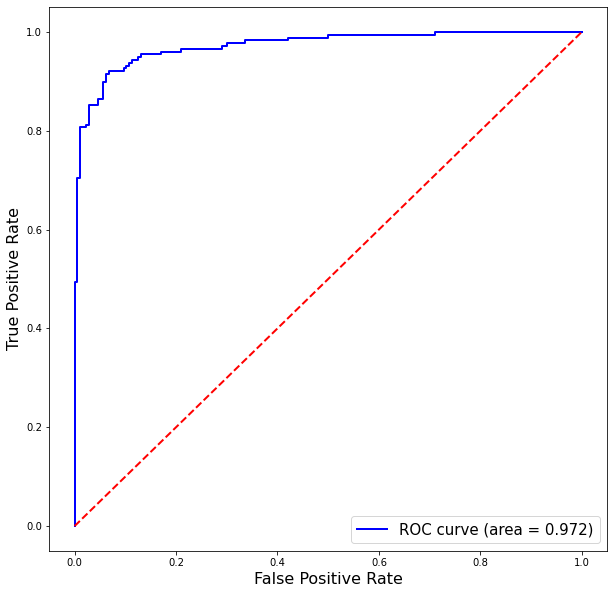

In [7]:
##ROC image:
premodel.auc_pred(list(test_pred_score),list(test_data[0].iloc[:,0]))

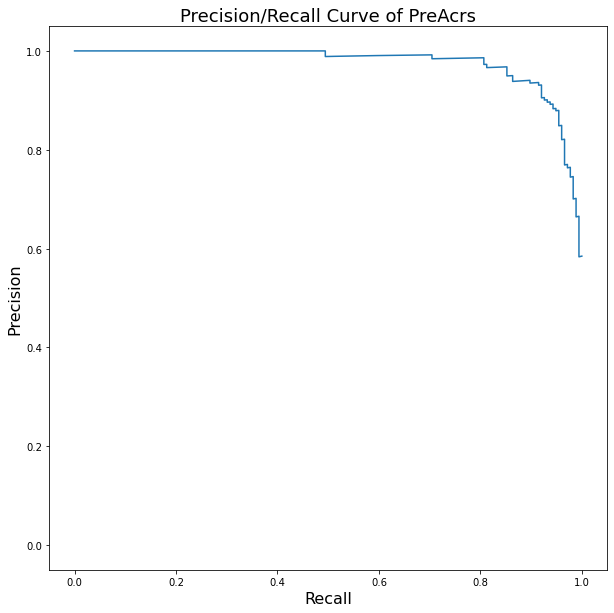

In [8]:
###PR curve
premodel.pr_curve(list(test_pred_score),list(test_data[0].iloc[:,0]))